# General Hamiltonians

This notebook shows how to build and encode Fermionic Hamiltonians with `ferrmion`. You can easily define any Hamiltonian you like, and there are some functions to make it even easier to create common Hamiltonians. If you want to see that, skip to the next section.

The encodings used in this notebook are known as the _naive_ versions of each encoding, because there is almost definitely a better version of it. `ferrmion` provides methods to get encodings optimised for your Hamiltonian. Check those out in the `Optimized Encodings` notebook.

If you need to go a step further and define your own encoding to optimise, you can do that too! Start with the `Ternary Tree Mappings` notebook.

## Defining a Hamiltonian

Fermionic hamiltonians are built up of a number of terms, each of which has:
- a "signature" of fermionic ladder opertors "+" and "-"
- a matrix of coefficients

You can build up arbitrary Hamiltonians by creating an empty one and adding terms.

Let's create one with a "+-" or _onsite_ term for a system with 5 _fermionic modes_ (orbitals or sites!).

In [1]:
import ferrmion as fr
import numpy as np

fham = fr.FermionHamiltonian()
n_modes = 2
onsite_coefficients = np.random.random((2,2))
fham.add_constant(10.)
fham.creation().annihilation().with_coefficients(onsite_coefficients)

FermionHamiltonian(+-, 2 modes, constant 10.0)

we could add an interaction term "+-+-" in the same way, making sure to keep the number of modes constant.

In [2]:
interaction_coefficients = np.random.random((2,2,2,2))

fham.creation().annihilation().creation().annihilation().with_coefficients(interaction_coefficients)

FermionHamiltonian(+-, +-+-, 2 modes, constant 10.0)

## Encoding a Hamiltonian.

To encode a Hamiltonian, we can either build an encoding using the `TernaryTree` class, or use an inbuilt encoding. Building your gives you **lots more functionality** but if you just want to encode a Hamiltonian, you can still use the optimisation methods in `ferrmion` if you like.

### Naive encodings
- `jordan_wigner`
- `bravyi_kitaev`
- `parity`
- `jkmn`

### TOPP-HATT Optimised
- `jordan_wigner_topphatt`
- `bravyi_kitaev_topphatt`
- `parity_topphatt`
- `jkmn_topphatt`

### Simulated-Annealing Optimised
- `jordan_wigner_annealed`
- `bravyi_kitaev_annealed`
- `parity_annealed`
- `jkmn_annealed`

In [3]:
fr.jordan_wigner(fham)

{'ZZ': (0.07546112733346622+0j),
 'YX': 0.20406889967632127j,
 'YY': (0.9466647920973997+0j),
 'XX': (0.9466647920973995+0j),
 'XY': -0.2040688996763214j,
 'IZ': (-0.7518619417117163+0j),
 'II': (11.325721649323086+0j),
 'ZI': (-0.6493208349448361+0j)}

In [4]:
fr.jordan_wigner_topphatt(fham)

{'XY': -0.2040688996763214j,
 'YY': (0.9466647920973997+0j),
 'ZI': (-0.6493208349448361+0j),
 'II': (11.325721649323086+0j),
 'YX': 0.20406889967632127j,
 'IZ': (-0.7518619417117163+0j),
 'XX': (0.9466647920973995+0j),
 'ZZ': (0.07546112733346622+0j)}

In [5]:
fr.bravyi_kitaev_annealed(fham)

{'ZZ': (-0.6493208349448361+0j),
 'ZX': (-0.9466647920973995+0j),
 'IY': -0.20406889967632127j,
 'IZ': (-0.7518619417117163+0j),
 'ZI': (0.07546112733346622+0j),
 'IX': (0.9466647920973997+0j),
 'II': (11.325721649323086+0j),
 'ZY': 0.2040688996763214j}

## TernaryTree

If you've built your own encoding, for instance using the TernaryTree class, you can also use this.

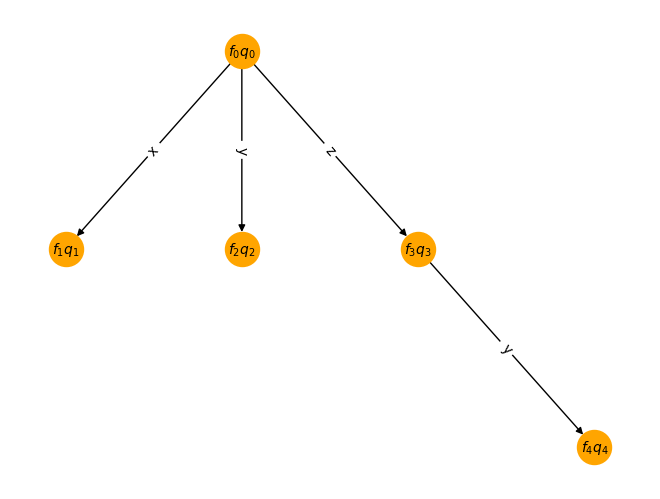

In [6]:
from ferrmion.visualise import draw_tt

tree = fr.TernaryTree(n_modes=5)
tree.add_node("zy")
tree.add_node("x")
tree.add_node("y")
tree.enumeration_scheme = tree.default_enumeration_scheme()
draw_tt(tree, type="standard", enumeration_scheme=tree.enumeration_scheme)

In [7]:
tree.encode(fham)

{'IYIII': -0.20406889967632127j,
 'ZXZII': (-0.9466647920973995+0j),
 'IXIII': (0.9466647920973997+0j),
 'IZIII': (-0.7518619417117163+0j),
 'ZZZII': (-0.6493208349448361+0j),
 'ZYZII': 0.2040688996763214j,
 'ZIZII': (0.07546112733346622+0j),
 'IIIII': (11.325721649323086+0j)}

In [8]:
tree.encode_annealed(fham)

{'ZYZII': 0.2040688996763214j,
 'ZZZII': (-0.6493208349448361+0j),
 'IXIII': (0.9466647920973997+0j),
 'ZIZII': (0.07546112733346622+0j),
 'IIIII': (11.325721649323086+0j),
 'IYIII': -0.20406889967632127j,
 'IZIII': (-0.7518619417117163+0j),
 'ZXZII': (-0.9466647920973995+0j)}

In [9]:
tree.encode_topphatt(fham)

{'ZZYII': 0.20406889967632127j,
 'IIZII': (0.6493208349448361+0j),
 'ZZZII': (-0.7518619417117163+0j),
 'ZZIII': (-0.07546112733346622+0j),
 'IIXII': (-0.9466647920973997+0j),
 'IIYII': 0.2040688996763214j,
 'IIIII': (11.325721649323086+0j),
 'ZZXII': (-0.9466647920973995+0j)}

# Inbuilt Hamiltonians

## Molecular Hamiltonian

This section shows how to use a Fermion-Qubit encoding to encode a second quantised Molecular hamiltonian.

$$H = \sum_{i,j} h_{ij}a^{\dagger}_i a_j + \sum_{i,j,k,l} h_{ijkl}a^{\dagger}_i a^{\dagger}_j a_k a_l $$

Let's first get the coefficients for our second quantised hamiltonian.

For the time being we can use randomly generated ones.

In [10]:
import ferrmion as fr
import numpy as np
constant_energy = 0
one_e_coeffs = np.random.random((3,3))
two_e_coeffs = np.random.random((3,3,3,3))

In [11]:
fermion_hamiltonian = fr.molecular_hamiltonian(one_e_coeffs=one_e_coeffs, two_e_coeffs=two_e_coeffs, constant_energy=constant_energy)
fermion_hamiltonian

FermionHamiltonian(+-, ++--, 3 modes, constant 0)

## Hubbard Hamiltonian 

This notebook shows how to use a Fermion-Qubit encoding to encode the second quantised Hubbard hamiltonian.

$$H_{Hubbard} = -t \sum_{\langle i,j \rangle,\sigma}(a^{\dagger}_{i,\sigma} a_{j, \sigma} + a^{\dagger}_{j, \sigma} a_{i,\sigma}) + U \sum_{i} \hat{n}_i \hat{n}_i$$

The Hubbard Hamiltonian needs two scaler coefficients, the kinetic term $t$ and the onsite-term $U$. 

We can either define both $t$ and $U$, or use the default $t=1$ and scale $U$ around it.

In [12]:
onsite_term = 2.
hopping_term = 0.5

We can now make a Hamiltonian for the size of system we want to look at, let's say 12 sites.

In [13]:
n_sites = 6

In [14]:
from ferrmion.hamiltonians import linear_adjacency_matrix
hamiltonian = fr.hubbard_hamiltonian(adjacency_matrix=linear_adjacency_matrix(n_sites, periodic=False), onsite_term=onsite_term, hopping_term=hopping_term)
hamiltonian

FermionHamiltonian(+-, +-+-, 6 modes, constant 0.0)

The function above will create matrices of coefficients for the "+-" and "+-+-" terms.

We can plot these to get a better idea of what they look like.

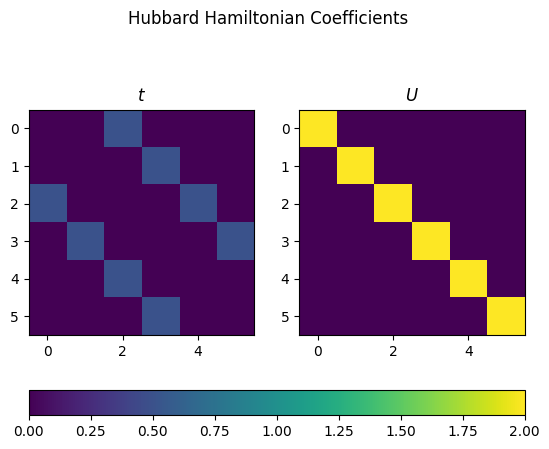

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
fig, axs = plt.subplots(1, 2)
fig.suptitle('Hubbard Hamiltonian Coefficients')
# create a single norm to be shared across all images
norm = colors.Normalize(vmin=np.min(0), vmax=np.max([onsite_term, hopping_term]))

axs[0].set_title("$t$")
axs[1].set_title("$U$")
images = []
images.append(axs[0].imshow(hamiltonian._terms["+-"], norm=norm))
# We use einsum to see the values for number operators
images.append(axs[1].imshow(np.einsum("iijj->ij", hamiltonian._terms["+-+-"]), norm=norm))
fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
plt.show()

Finally, we can encode the Hamiltonian as before.

In [16]:
fr.parity(hamiltonian)

{'IYYIII': (-0.25+0j),
 'IIIIII': (6+0j),
 'IIIIIZ': (-1+0j),
 'ZZIIII': (-1+0j),
 'IIIZZI': (-1+0j),
 'IIIIYY': (-0.25+0j),
 'IIIZXX': (-0.25+0j),
 'ZXXZII': (-0.25+0j),
 'IZZIII': (-1+0j),
 'IIYYII': (-0.25+0j),
 'IIZZII': (-1+0j),
 'IIZXXZ': (-0.25+0j),
 'IZXXZI': (-0.25+0j),
 'IIIIZZ': (-1+0j),
 'IIIYYI': (-0.25+0j)}